# Effects of user age, user gender, user type and days of week on trip duration
## by Pacifique Clement Ndayisenga

## Investigation Overview

In my investigation, I was interested in how trip duration is dependent on other features such as age, user type, user gender, and day of the week. My focus was on age, user type, gender and days of the week and what is their impact on the trip duration.


## Dataset Overview

The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset consists of 183412 rides taken in a bike-sharing system covering the greater San Francisco Bay area in the month of February of 2019. The dataset consists of 16 features that include trip duration in seconds, rider type and gender, the start and end timestamp of the trip and so on.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set_style('darkgrid')

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Drop missing values
df.dropna(inplace=True)

# Convert columns with wrong data types
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['bike_id'] = df.bike_id.astype(str)
df['member_birth_year'] = df.member_birth_year.astype(int)
df['start_station_id'] = df.start_station_id.astype(int)
df['start_station_id'] = df.start_station_id.astype(str)
df['end_station_id'] = df.end_station_id.astype(int)
df['end_station_id'] = df.end_station_id.astype(str)

## Trip duration distribution

Trip durations in the dataset take on a very large range of values, but the average trip duration is around 500 seconds.

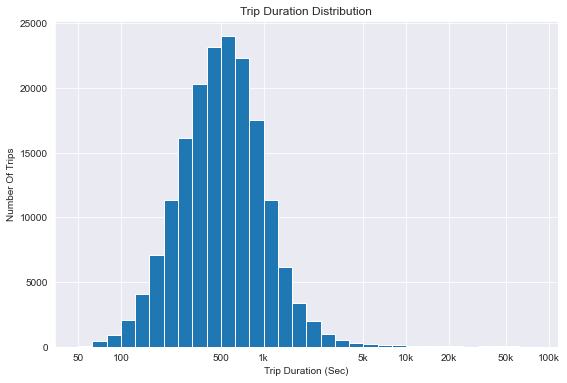

In [20]:
bins = 10 ** np.arange(1.7, 4.9 + 0.1, 0.1)
x_ticks = [50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5]
x_labels = [50, 100, 500, '1k', '5k', '10k', '20k', '50k', '100k']

plt.figure(figsize=[9, 6])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration (Sec)')
plt.ylabel('Number Of Trips')
plt.xscale('log')
plt.xticks(x_ticks, x_labels);

## Trip duration vs Age

Young riders spend more time in a trip than the older ones. Most of them are between 20 and 50 years old.

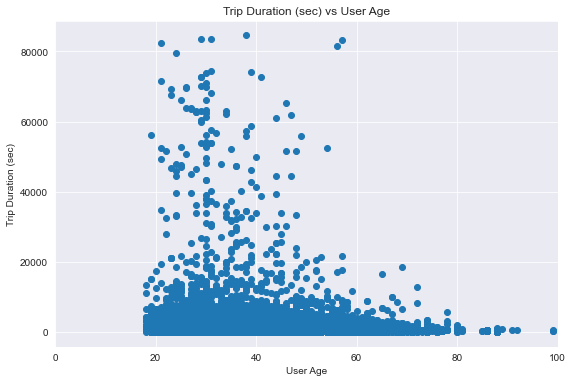

In [27]:
plt.figure(figsize=[9, 6])
df['age'] = 2019 - df.member_birth_year
plt.scatter(data = df, x = 'age', y = 'duration_sec')
plt.title('Trip Duration (sec) vs User Age')
plt.xlabel('User Age')
plt.ylabel('Trip Duration (sec)')
plt.xlim([0, 100]);

## Trip duration vs Day

Weekend trips take longer compared to the ones taken during the week

In [22]:
# Get start and end day start_time and end_time respectively
df['start_day'] = df.start_time.dt.day_name()
df['end_day'] = df.end_time.dt.day_name()

# convert day, and hour into ordered categorical types
categories = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
            'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']}

for key in categories:
    category = pd.api.types.CategoricalDtype(ordered = True, categories = categories[key])
    df[key] = df[key].astype(category)

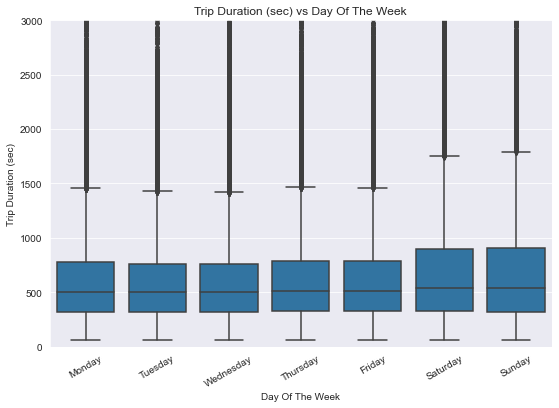

In [26]:
plt.figure(figsize=[9, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'start_day', y = 'duration_sec', color = base_color);
plt.title('Trip Duration (sec) vs Day Of The Week')
plt.xlabel('Day Of The Week')
plt.ylabel('Trip Duration (sec)')
plt.xticks(rotation=30)
plt.ylim([0, 3000]);

## Trip duration vs User type

Customer users spend more time in a trip than subscribed users

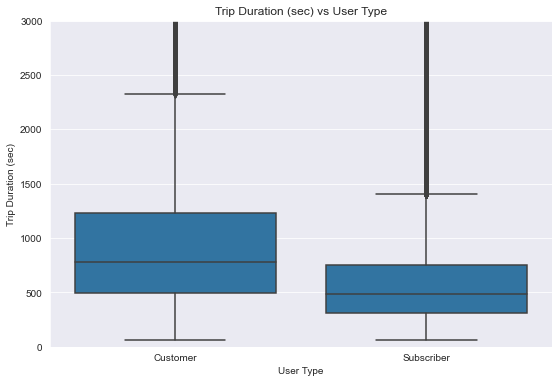

In [25]:
plt.figure(figsize=[9, 6])
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color);
plt.title('Trip Duration (sec) vs User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (sec)')
plt.ylim([0, 3000]);

## Trip duration vs User gender

Female and other genders spend more time in a trip than male users

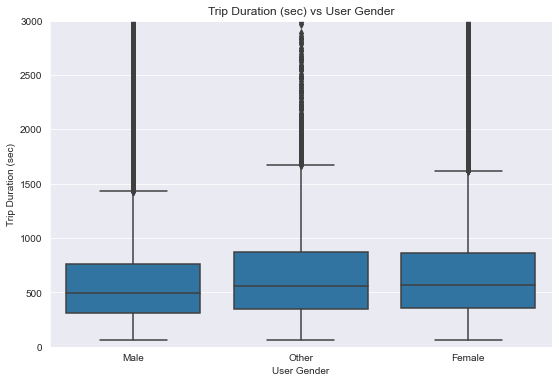

In [28]:
plt.figure(figsize=[9, 6])
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color);
plt.title('Trip Duration (sec) vs User Gender')
plt.xlabel('User Gender')
plt.ylabel('Trip Duration (sec)')
plt.ylim([0, 3000]);

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

# Thank You 